In [60]:
from pathlib import Path

import pandas as pd
from icecream import colorize, ic

from backend.Database import Database

from icecream import ic, colorize

import seaborn as sns
import matplotlib.pyplot as plt

ic.configureOutput(outputFunction=lambda s: print(colorize(s) + "\n"))  # print debug
ic("bonjour");

ic| 'bonjour'



Creation dataframe

In [61]:
db = Database()
client = db.client


pipeline = [
    {
        "$lookup": {
            "from": "poubelle",
            "localField": "id_poubelle",
            "foreignField": "_id",
            "as": "poubelleInfo",
        },
    },
    {"$unwind": "$poubelleInfo"},
]


df = pd.DataFrame(list(client.historiquePoubelle.aggregate(pipeline)))
df

connexion to db established !



,_id,id_poubelle,coef_touristes,date,niveau_remplissage,poubelleInfo
0,6584ad110086777823b884ce,6584ad110086777823b884cd,1,2023-01-01,5,"{'_id': 6584ad110086777823b884cd, 'coef_touris..."
1,6584ad110086777823b884d0,6584ad110086777823b884cf,1,2023-01-01,18,"{'_id': 6584ad110086777823b884cf, 'coef_touris..."
2,6584ad110086777823b884d2,6584ad110086777823b884d1,1,2023-01-01,21,"{'_id': 6584ad110086777823b884d1, 'coef_touris..."
3,6584ad120086777823b884d4,6584ad120086777823b884d3,1,2023-01-01,12,"{'_id': 6584ad120086777823b884d3, 'coef_touris..."
4,6584ad120086777823b884d6,6584ad120086777823b884d5,1,2023-01-01,9,"{'_id': 6584ad120086777823b884d5, 'coef_touris..."
...,...,...,...,...,...,...
38492,6584b3d10086777823b91b9f,6584b3a10086777823b91759,1,2023-12-31,97,"{'_id': 6584b3a10086777823b91759, 'coef_touris..."
38493,6584b3d10086777823b91ba0,6584b3a10086777823b9175b,1,2023-12-31,92,"{'_id': 6584b3a10086777823b9175b, 'coef_touris..."
38494,6584b3d10086777823b91ba1,6584b3a00086777823b91757,1,2024-01-01,103,"{'_id': 6584b3a00086777823b91757, 'coef_touris..."
38495,6584b3d10086777823b91ba2,6584b3a10086777823b91759,1,2024-01-01,100,"{'_id': 6584b3a10086777823b91759, 'coef_touris..."


In [62]:
print(df.loc[0, "poubelleInfo"])

{'_id': ObjectId('6584ad110086777823b884cd'), 'coef_touristes': None, 'densite': None, 'id_zone': ObjectId('6584ad110086777823b884cc'), 'gps': '42°36\'39"N 9°21\'14"E', 'nextCollectionDate': None}


In [63]:
df["id_zone"] = df["poubelleInfo"].map(lambda x: x["id_zone"])
df["gps"] = df["poubelleInfo"].map(lambda x: x["gps"])

In [64]:
df

,_id,id_poubelle,coef_touristes,date,niveau_remplissage,poubelleInfo,id_zone,gps
0,6584ad110086777823b884ce,6584ad110086777823b884cd,1,2023-01-01,5,"{'_id': 6584ad110086777823b884cd, 'coef_touris...",6584ad110086777823b884cc,"42°36'39""N 9°21'14""E"
1,6584ad110086777823b884d0,6584ad110086777823b884cf,1,2023-01-01,18,"{'_id': 6584ad110086777823b884cf, 'coef_touris...",6584ad110086777823b884cc,"42°36'44""N 9°21'24""E"
2,6584ad110086777823b884d2,6584ad110086777823b884d1,1,2023-01-01,21,"{'_id': 6584ad110086777823b884d1, 'coef_touris...",6584ad110086777823b884cc,"42°36'51""N 9°21'17""E"
3,6584ad120086777823b884d4,6584ad120086777823b884d3,1,2023-01-01,12,"{'_id': 6584ad120086777823b884d3, 'coef_touris...",6584ad110086777823b884cc,"42°36'55""N 9°21'05""E"
4,6584ad120086777823b884d6,6584ad120086777823b884d5,1,2023-01-01,9,"{'_id': 6584ad120086777823b884d5, 'coef_touris...",6584ad110086777823b884cc,"42°37'01""N 9°21'20""E"
...,...,...,...,...,...,...,...,...
38492,6584b3d10086777823b91b9f,6584b3a10086777823b91759,1,2023-12-31,97,"{'_id': 6584b3a10086777823b91759, 'coef_touris...",6584b3a00086777823b91756,"42°35'54""N 9°16'02""E"
38493,6584b3d10086777823b91ba0,6584b3a10086777823b9175b,1,2023-12-31,92,"{'_id': 6584b3a10086777823b9175b, 'coef_touris...",6584b3a00086777823b91756,"42°36'05""N 9°16'16""E"
38494,6584b3d10086777823b91ba1,6584b3a00086777823b91757,1,2024-01-01,103,"{'_id': 6584b3a00086777823b91757, 'coef_touris...",6584b3a00086777823b91756,"42°35'53""N 9°15'53""E"
38495,6584b3d10086777823b91ba2,6584b3a10086777823b91759,1,2024-01-01,100,"{'_id': 6584b3a10086777823b91759, 'coef_touris...",6584b3a00086777823b91756,"42°35'54""N 9°16'02""E"


In [65]:
df = df.drop(columns=["_id", "id_poubelle", "poubelleInfo"])

In [66]:
df

,coef_touristes,date,niveau_remplissage,id_zone,gps
0,1,2023-01-01,5,6584ad110086777823b884cc,"42°36'39""N 9°21'14""E"
1,1,2023-01-01,18,6584ad110086777823b884cc,"42°36'44""N 9°21'24""E"
2,1,2023-01-01,21,6584ad110086777823b884cc,"42°36'51""N 9°21'17""E"
3,1,2023-01-01,12,6584ad110086777823b884cc,"42°36'55""N 9°21'05""E"
4,1,2023-01-01,9,6584ad110086777823b884cc,"42°37'01""N 9°21'20""E"
...,...,...,...,...,...
38492,1,2023-12-31,97,6584b3a00086777823b91756,"42°35'54""N 9°16'02""E"
38493,1,2023-12-31,92,6584b3a00086777823b91756,"42°36'05""N 9°16'16""E"
38494,1,2024-01-01,103,6584b3a00086777823b91756,"42°35'53""N 9°15'53""E"
38495,1,2024-01-01,100,6584b3a00086777823b91756,"42°35'54""N 9°16'02""E"


In [67]:
df_zone = pd.DataFrame(list(client.zone.find({})))
df_zone = df_zone.set_index("_id")
df_zone

,nom,gps,densite,nb_poubelles
_id,,,,
6584ad110086777823b884cc,Olmeta di tuda,None,442,None
6584ad860086777823b88ed6,Rapale,None,149,None
6584add50086777823b89602,Santu petro di tenda,None,360,None
6584ae170086777823b89c03,Barbaggio,None,266,None
6584aeb50086777823b8a984,Sorio,None,137,None
6584aed80086777823b8ac63,Pieve,None,118,None
6584aef80086777823b8af42,Oletta,None,1587,None
6584afd40086777823b8c2c3,Saint florent,None,1634,None
6584b1090086777823b8ddc4,Poggio oletta,None,218,None


In [68]:
id_to_pop = {}

for tup in df_zone.itertuples():
    id_to_pop[tup.Index] = tup.densite

In [69]:
df["densite"] = df["id_zone"].map(lambda x: id_to_pop[x])

In [70]:
df

,coef_touristes,date,niveau_remplissage,id_zone,gps,densite
0,1,2023-01-01,5,6584ad110086777823b884cc,"42°36'39""N 9°21'14""E",442
1,1,2023-01-01,18,6584ad110086777823b884cc,"42°36'44""N 9°21'24""E",442
2,1,2023-01-01,21,6584ad110086777823b884cc,"42°36'51""N 9°21'17""E",442
3,1,2023-01-01,12,6584ad110086777823b884cc,"42°36'55""N 9°21'05""E",442
4,1,2023-01-01,9,6584ad110086777823b884cc,"42°37'01""N 9°21'20""E",442
...,...,...,...,...,...,...
38492,1,2023-12-31,97,6584b3a00086777823b91756,"42°35'54""N 9°16'02""E",68
38493,1,2023-12-31,92,6584b3a00086777823b91756,"42°36'05""N 9°16'16""E",68
38494,1,2024-01-01,103,6584b3a00086777823b91756,"42°35'53""N 9°15'53""E",68
38495,1,2024-01-01,100,6584b3a00086777823b91756,"42°35'54""N 9°16'02""E",68


In [71]:
df = df.drop(columns="id_zone")

In [72]:
df

,coef_touristes,date,niveau_remplissage,gps,densite
0,1,2023-01-01,5,"42°36'39""N 9°21'14""E",442
1,1,2023-01-01,18,"42°36'44""N 9°21'24""E",442
2,1,2023-01-01,21,"42°36'51""N 9°21'17""E",442
3,1,2023-01-01,12,"42°36'55""N 9°21'05""E",442
4,1,2023-01-01,9,"42°37'01""N 9°21'20""E",442
...,...,...,...,...,...
38492,1,2023-12-31,97,"42°35'54""N 9°16'02""E",68
38493,1,2023-12-31,92,"42°36'05""N 9°16'16""E",68
38494,1,2024-01-01,103,"42°35'53""N 9°15'53""E",68
38495,1,2024-01-01,100,"42°35'54""N 9°16'02""E",68


In [73]:
def normalise_niveau(x):
    if x < 0:
        return 0
    elif x > 100:
        return 100
    else:
        return x

df["niveau_remplissage"] = df["niveau_remplissage"].map(normalise_niveau)

In [74]:
df["date"] = pd.to_datetime(df["date"])


In [77]:
df

,coef_touristes,date,niveau_remplissage,gps,densite
0,1,2023-01-01,5,"42°36'39""N 9°21'14""E",442
1,1,2023-01-01,18,"42°36'44""N 9°21'24""E",442
2,1,2023-01-01,21,"42°36'51""N 9°21'17""E",442
3,1,2023-01-01,12,"42°36'55""N 9°21'05""E",442
4,1,2023-01-01,9,"42°37'01""N 9°21'20""E",442
...,...,...,...,...,...
38492,1,2023-12-31,97,"42°35'54""N 9°16'02""E",68
38493,1,2023-12-31,92,"42°36'05""N 9°16'16""E",68
38494,1,2024-01-01,100,"42°35'53""N 9°15'53""E",68
38495,1,2024-01-01,100,"42°35'54""N 9°16'02""E",68


<Axes: xlabel='date', ylabel='niveau_remplissage'>

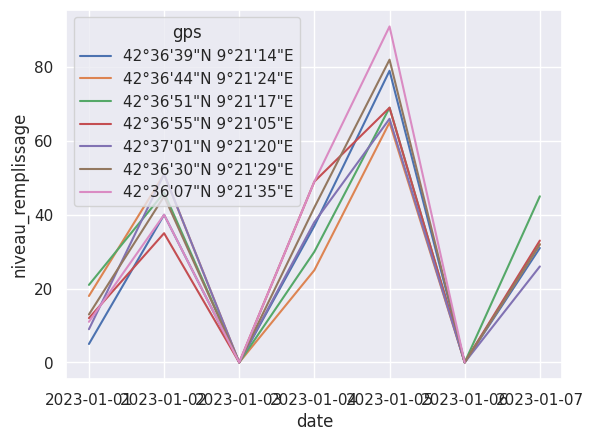

In [82]:
sns.set_theme(style="darkgrid")

sns.lineplot(x="date", y="niveau_remplissage", hue="gps", data=df.iloc[:48,:])

In [87]:

list_mask = []
flag_next = False
for tup in df.itertuples():
    if tup.niveau_remplissage == 0:
        flag_next = True
        list_mask.append(True)
    elif flag_next:
        flag_next = False
        list_mask.append(True)
    else:
        list_mask.append(False)
    
df[list_mask]   
        

,coef_touristes,date,niveau_remplissage,gps,densite
14,1,2023-01-03,0,"42°36'39""N 9°21'14""E",442
15,1,2023-01-03,0,"42°36'44""N 9°21'24""E",442
16,1,2023-01-03,0,"42°36'51""N 9°21'17""E",442
17,1,2023-01-03,0,"42°36'55""N 9°21'05""E",442
18,1,2023-01-03,0,"42°37'01""N 9°21'20""E",442
...,...,...,...,...,...
38479,1,2023-12-27,32,"42°35'53""N 9°15'53""E",68
38485,1,2023-12-29,0,"42°35'53""N 9°15'53""E",68
38486,1,2023-12-29,0,"42°35'54""N 9°16'02""E",68
38487,1,2023-12-29,0,"42°36'05""N 9°16'16""E",68


In [ ]:
target = "niveau_remplissage"
df_y = df[target]
df_x = df.drop(columns=target)